In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.colors import LogNorm

In [2]:
background_images_path = "backgrounds/"
background_VIS_image = "IC342_VIS.fits"

In [3]:
# Cargar el archivo FITS
file_name = 'backgrounds/IC342_VIS.fits'
hdul = fits.open(file_name)
data = hdul[0].data
header = hdul[0].header
wcs = WCS(header)
hdul.close()

In [4]:
# Parámetros de la imagen
zp = 30.137
pix_scale = 0.1  # arcsec/pixel

# Convertir la imagen a brillo superficial en mag/arcsec^2
data = np.where(data > 0, data, 1) 
brillo_superficial = zp - 2.5 * np.log10(data) + 2.5 * np.log10(pix_scale**2)

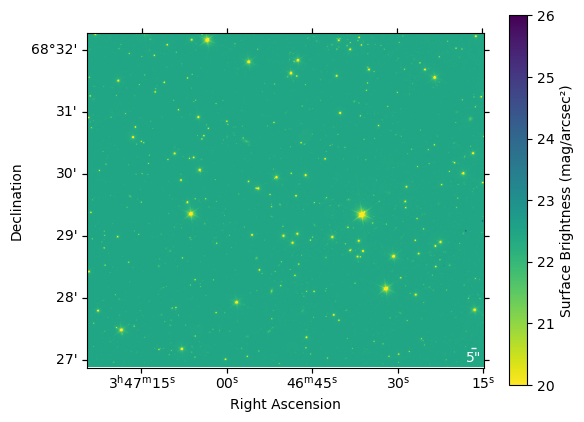

In [8]:
# Create the figure and axis with WCS
fig, ax = plt.subplots(subplot_kw={'projection': wcs})
im = ax.imshow(brillo_superficial, cmap='viridis_r', origin='lower', vmin=20, vmax=26)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Surface Brightness (mag/arcsec²)')

# Add the scale bar
scale_length = 5  # length of the scale bar in arcsec
scale_pixel_length = scale_length / pix_scale  # length in pixels

# Add the scale bar to the plot
scalebar = AnchoredSizeBar(ax.transData,
                           scale_pixel_length,
                           f'{scale_length}"',
                           'lower right', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=1)
ax.add_artist(scalebar)

# Show the plot
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.savefig('background_vis.png', dpi=300)  # Save the image
plt.show()